# Titanic Survival Prediction Project
The Titanic Survival Prediction project involves building a predictive model to estimate passenger survival rates based on features like age, sex, and class. The model uses machine learning techniques to analyze historical data and provide survival probability predictions for each passenger.




# Methodology

#### 1.Data preprocessing
#### 2.Exploratory data analysis (EDA)
#### 3.Feature engineering
#### 4.Model selection and hyperparameter tuning
#### 5.Model evaluation



# Results
The final model achieved an accuracy of 80% on the testing set, indicating that it can accurately predict the survival of passengers based on their characteristics.


# Code Organization
The code is organized into sections for data loading and preprocessing, EDA, feature engineering, model selection and hyperparameter tuning, model evaluation, and model export.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
data = pd.read_csv("Titanic.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# checking missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

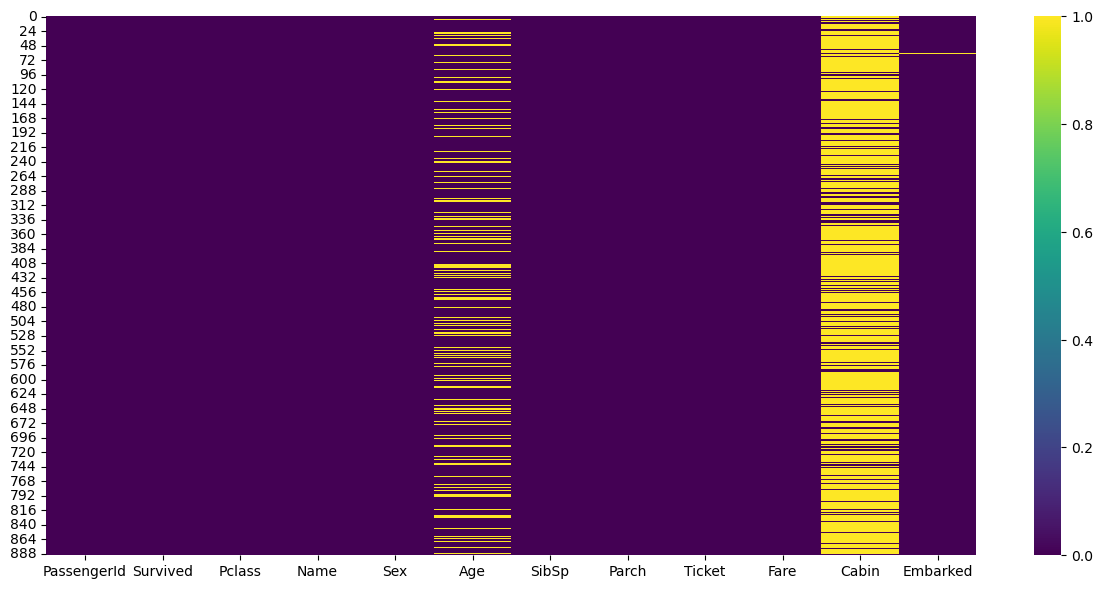

In [5]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.isnull(), cmap='viridis')

# Handling Missing Values

In [12]:

# we will drop the cabin coloumn as it has more than 60% missing values
data.drop(columns = 'Cabin',inplace = True)

In [13]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
# now we will handle the missing value of Embarked columns
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [15]:
data['Embarked'].fillna("S",inplace=True)

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [17]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [18]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

In [19]:
# checking the survival chances according to their classes
data.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

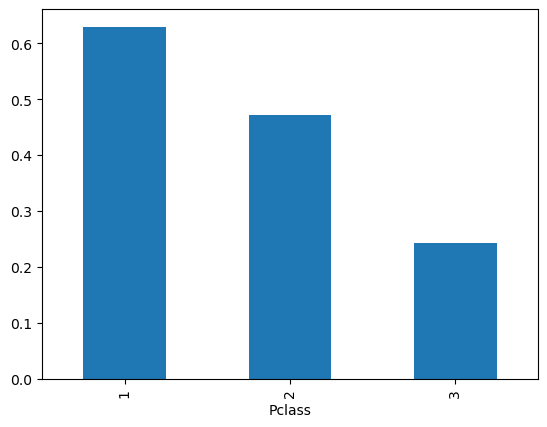

In [20]:
#this shows that the people who were on 1st class have most chance of survival
data.groupby(['Pclass'])['Survived'].mean().plot(kind="bar",x="Pclass",y="Survived")

In [21]:
# checking the survival chances according to their gender
data.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<Axes: xlabel='Sex'>

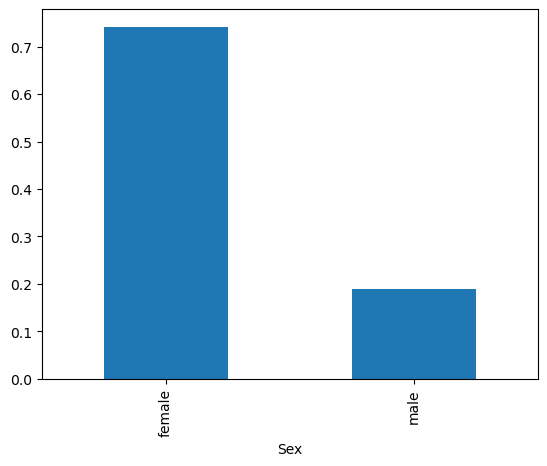

In [22]:
# this shows that mostly females were survived as compared to men
data.groupby(['Sex'])['Survived'].mean().plot(kind="bar",x="Sex",y="Survived")

<Axes: xlabel='Age', ylabel='Density'>

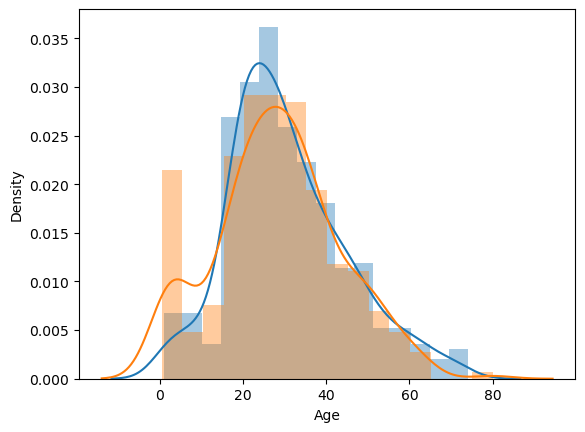

In [11]:
# this shows that mostly children and old people were saved first
# mostly peolpe of age 30-45 were died most
sns.distplot(data['Age'][data['Survived']==0])
sns.distplot(data['Age'][data['Survived']==1])

In [10]:
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Fare', ylabel='Density'>

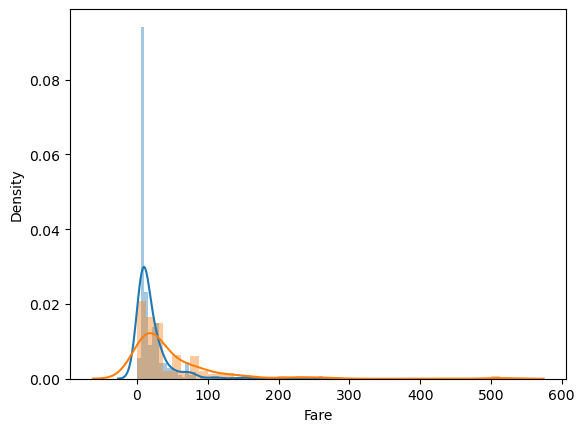

In [28]:
# this shows as the fare increses the chance of surviving also increses
sns.distplot(data['Fare'][data['Survived']==0])
sns.distplot(data['Fare'][data['Survived']==1])

In [29]:
# removing the ticket column as it has not any kind of significant info
data.drop(columns=["Ticket"],inplace=True)

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# Feature Construction

In [32]:
# now we will add the SibSp	and Parch columns and make a single column name family
# here 1 indicates the guy himself travelling
data['Family'] = data['SibSp'] + data['Parch'] + 1

In [33]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C,1


In [34]:
data['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [35]:
#  checking which family member survived the most
data.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [36]:
# we make a function that that tells us weather a person is travelling alone or with family member and enter his value in new column
def mem(number):
    if number == 1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Medium"
    else:
        return "Large"

In [37]:
data['Family_Size'] = data['Family'].apply(mem)

In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [39]:
# now again droping columns which has no meaningful values
data.drop(columns =['SibSp','Parch','Family'] ,inplace=True)

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Alone


In [41]:
data.shape

(891, 9)

In [42]:
data.drop(columns =['Name','PassengerId'] ,inplace=True)

In [44]:
data.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_Size    0
dtype: int64

In [46]:
# now converting categorical column  into numerical
data=pd.get_dummies(data, columns=['Pclass','Sex','Embarked','Family_Size'],drop_first=True)

In [47]:
data.shape

(891, 10)

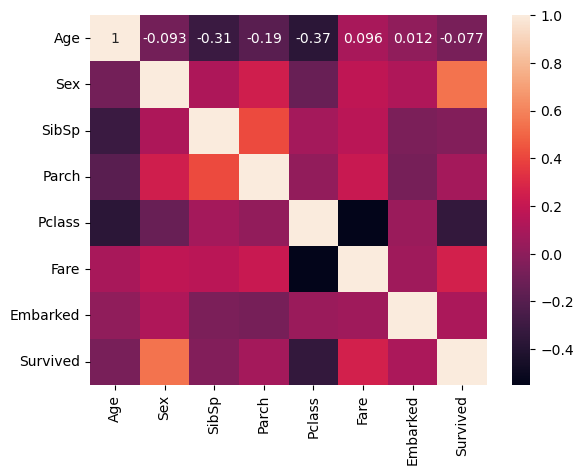

In [6]:
# Correlation Between Features
#data["Sex"] = [0 if i == "male" else 1 for i in data["Sex"]]
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# male: 0, famela: 1
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

# Model Training

In [50]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
classifier=DecisionTreeClassifier()

In [56]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred=classifier.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7932960893854749